In [40]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from pyod.models.cof import COF
from pyod.utils.data import get_outliers_inliers
from pyod.models.lof import LOF
from pyod.models.lunar import LUNAR

In [41]:
def add_sub_plot(X_inliers, X_outliers, sub_plot_title,
                inlier_color='blue', outlier_color='orange'):
        """Internal method to add subplot of inliers and outliers.

        Parameters
        ----------
        X_inliers : numpy array of shape (n_samples, n_features)
            Outliers.

        X_outliers : numpy array of shape (n_samples, n_features)
            Inliers.

        sub_plot_title : str
            Subplot title.

        inlier_color : str, optional (default='blue')
            The color of inliers.

        outlier_color : str, optional (default='orange')
            The color of outliers.

        """
        plt.axis("equal")
        plt.scatter(X_inliers[:, 0], X_inliers[:, 1], label='normalne',
                    color=inlier_color, s=10)
        plt.scatter(X_outliers[:, 0], X_outliers[:, 1],
                    label='anomalie', color=outlier_color, s=15, marker='^')
        plt.title(sub_plot_title, fontsize=15)
        plt.xlabel('dist(X,Y)')
        plt.ylabel('Z')
        plt.legend(loc=3, prop={'size': 10})

e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: Fut

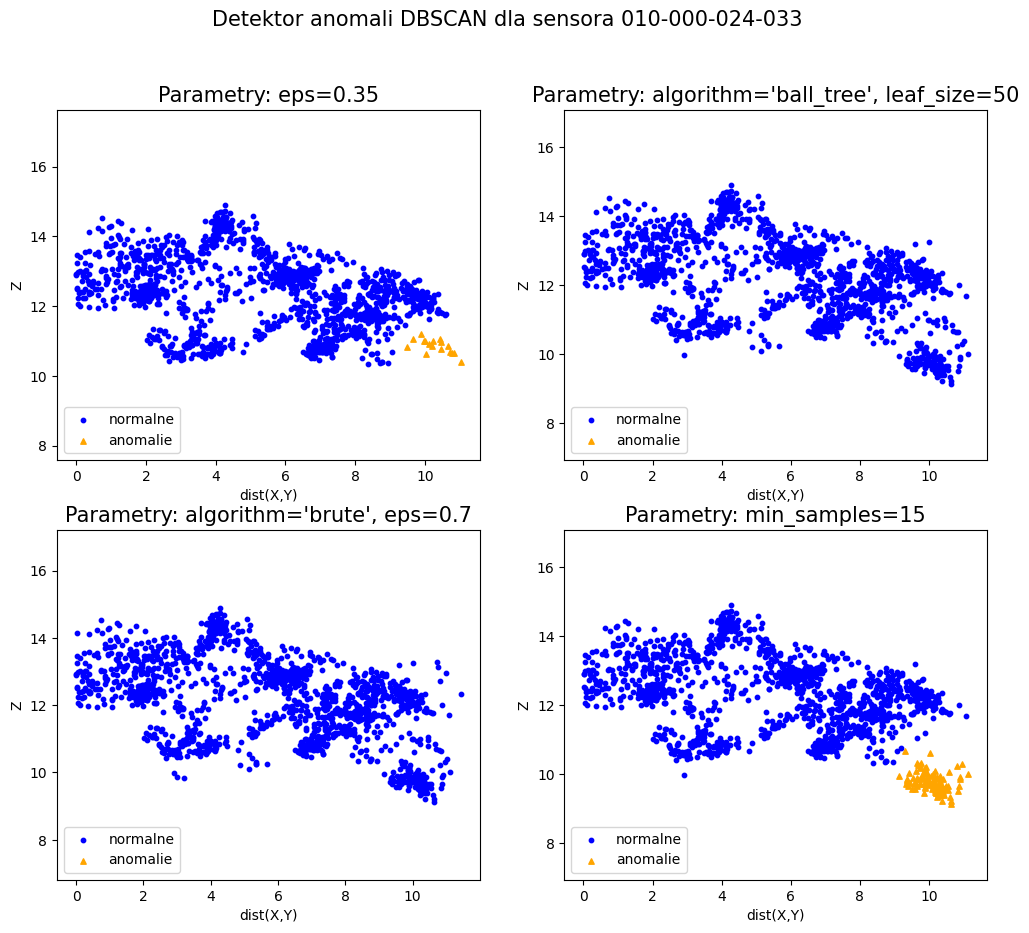

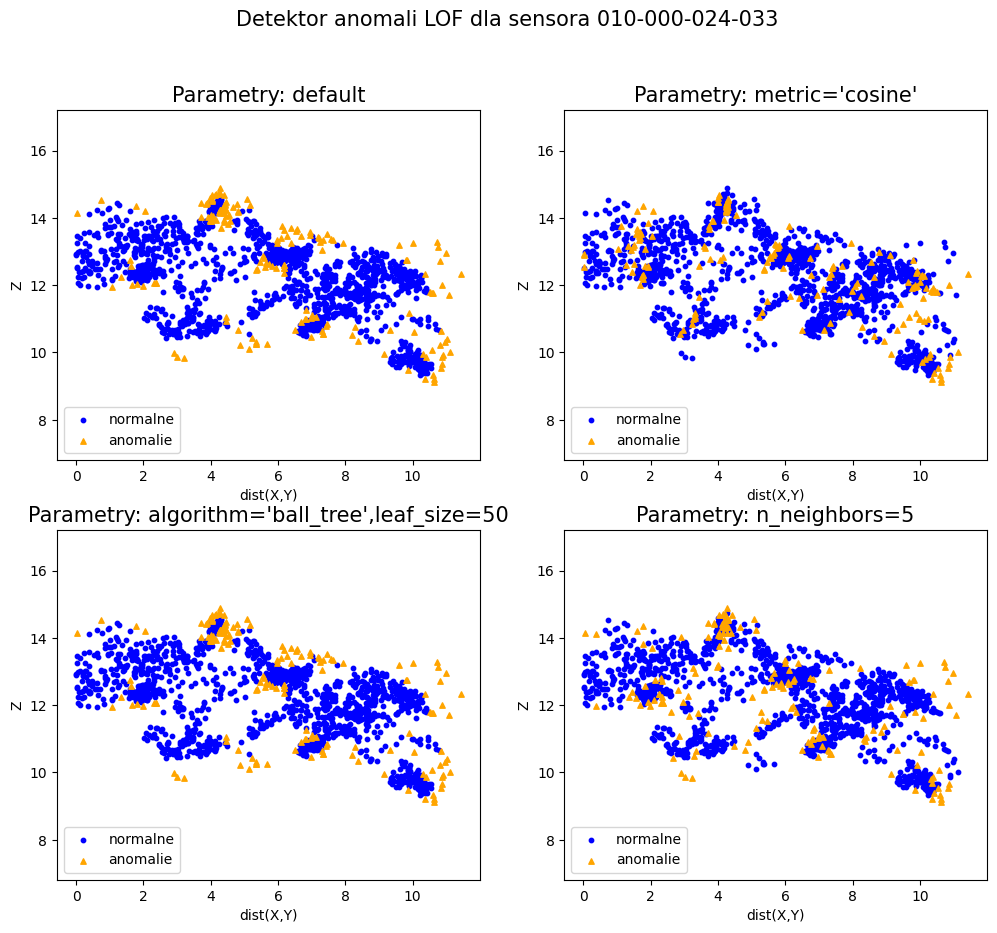

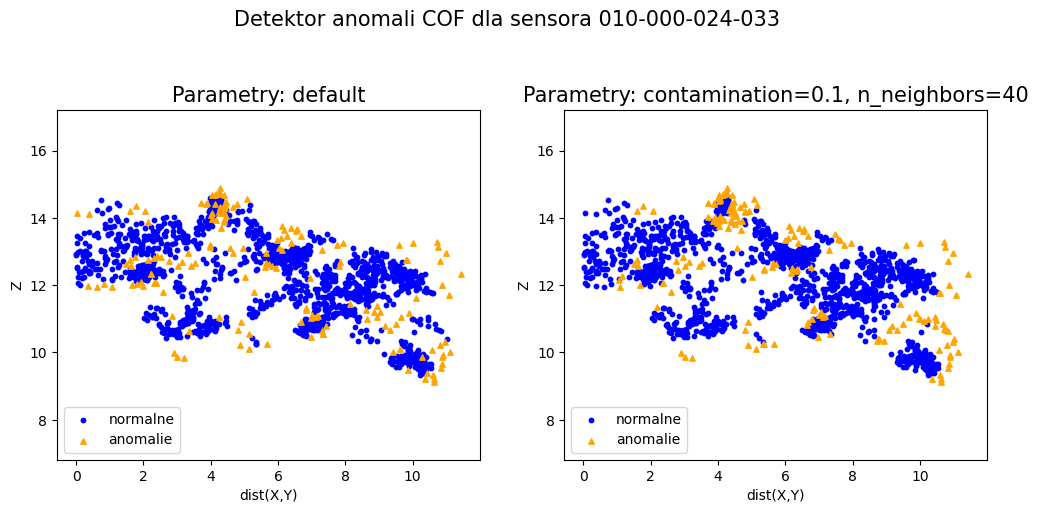

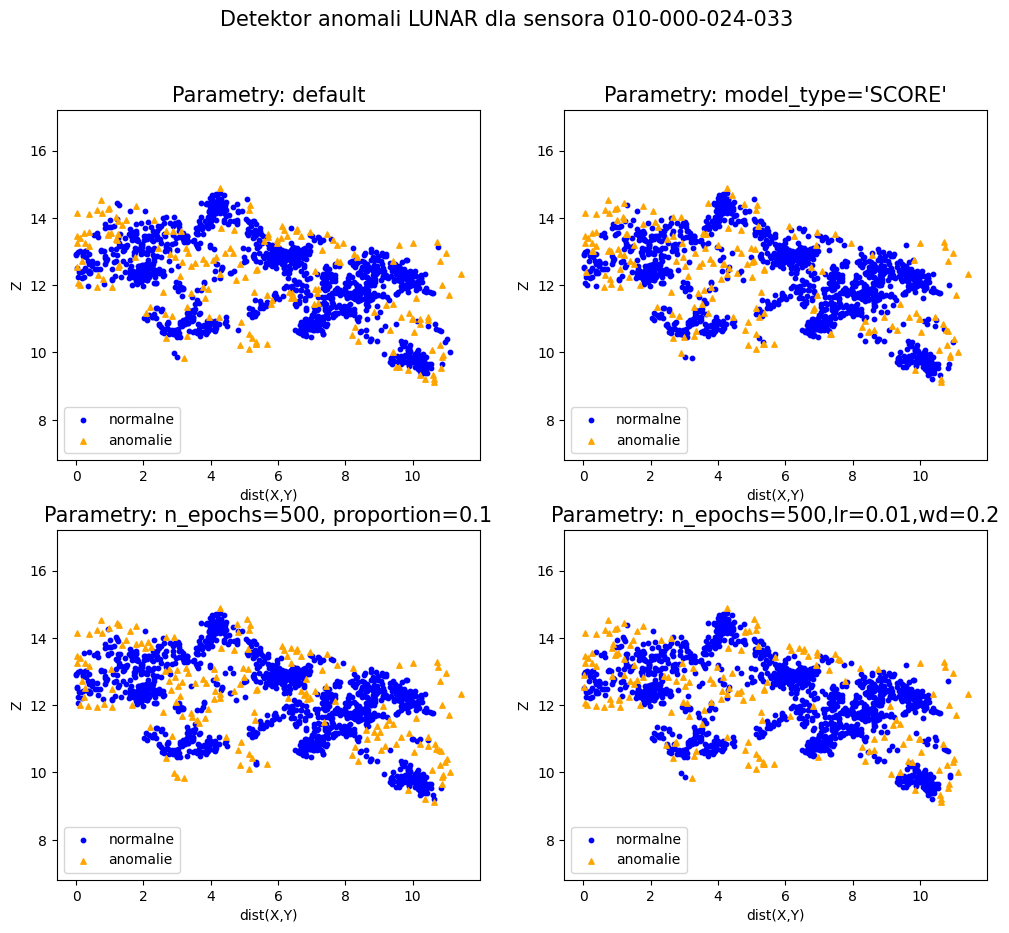

e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: Fut

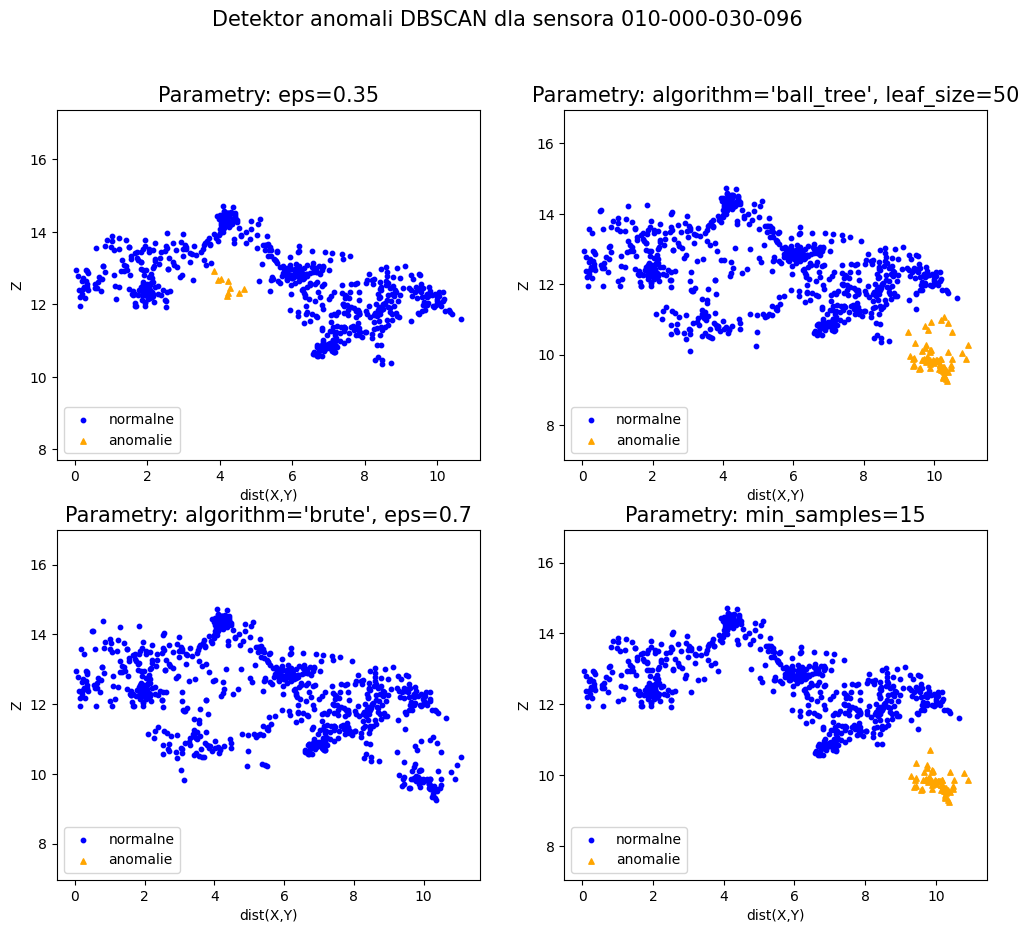

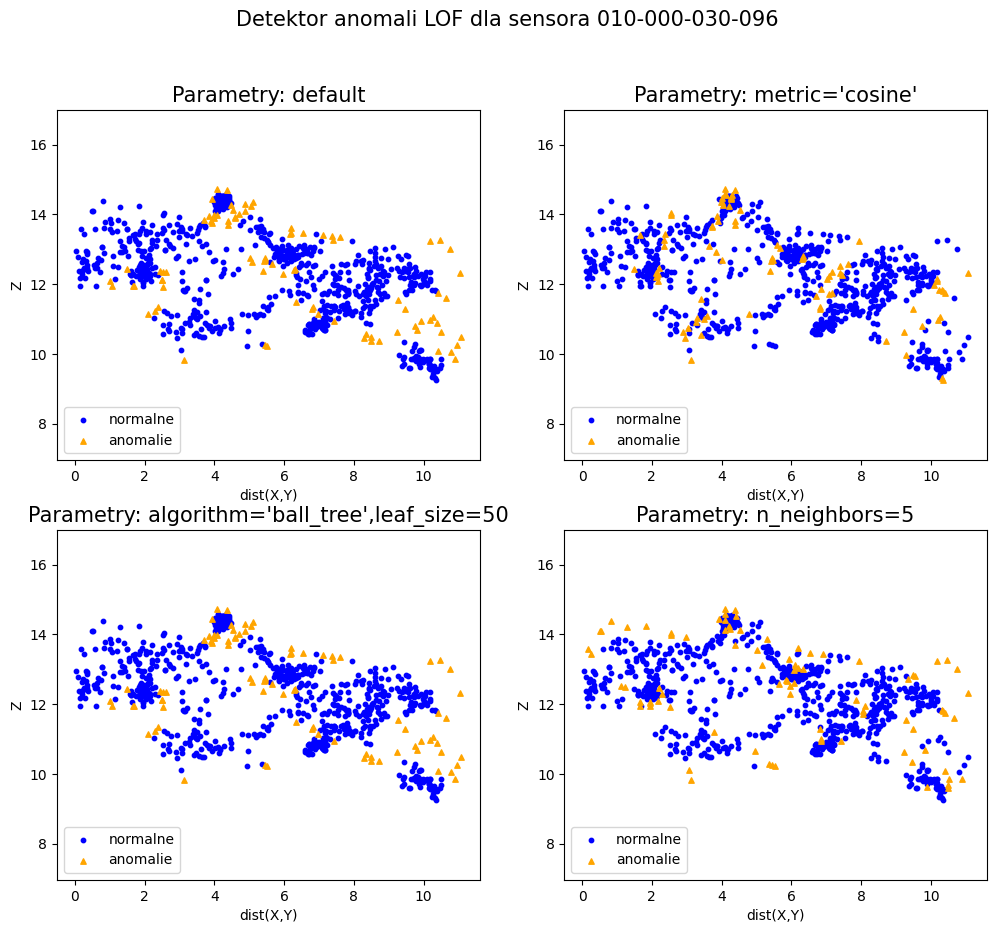

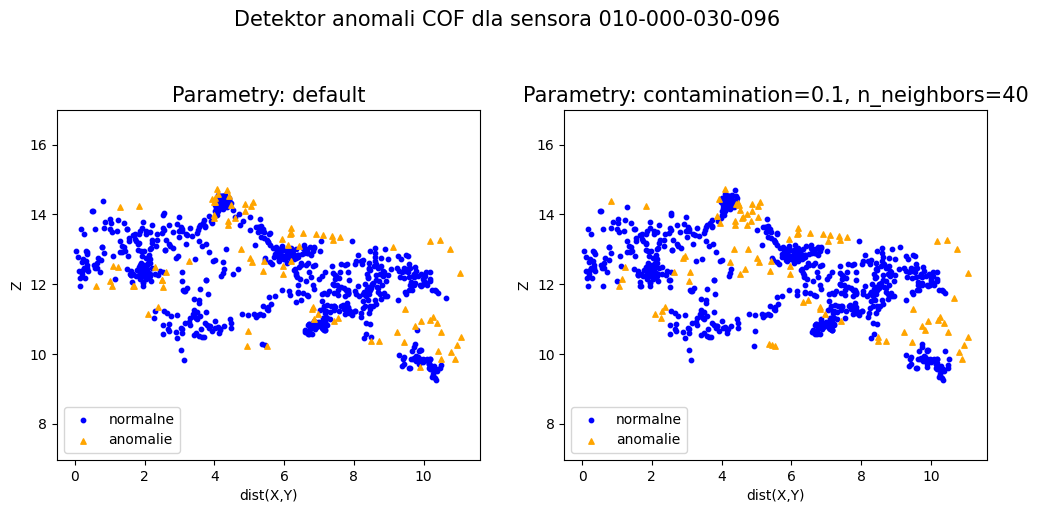

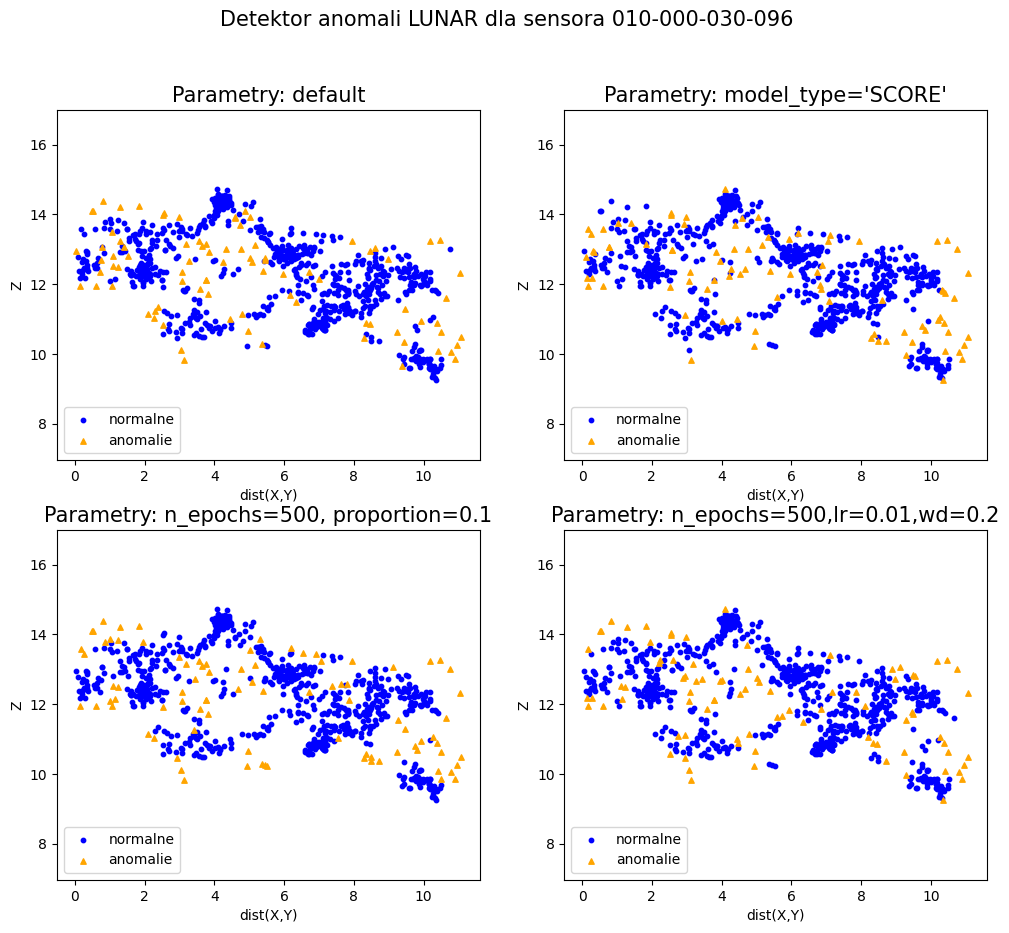

e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: Fut

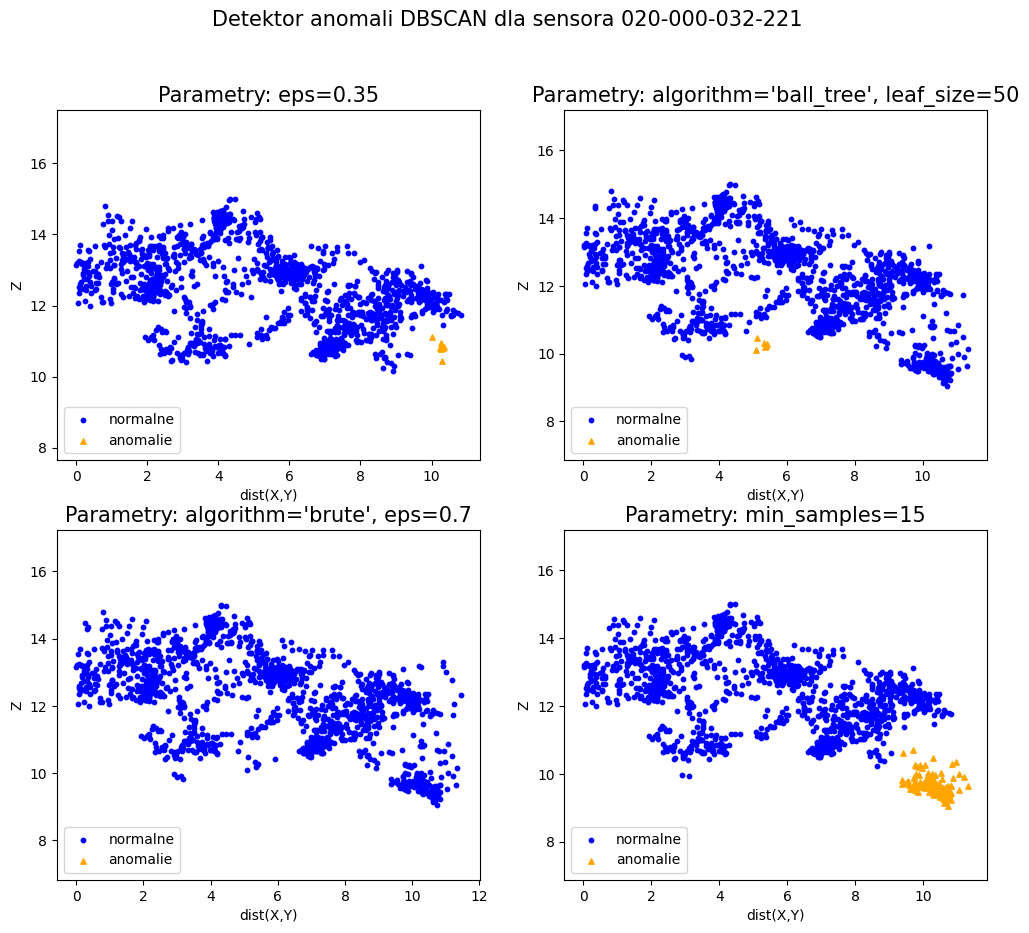

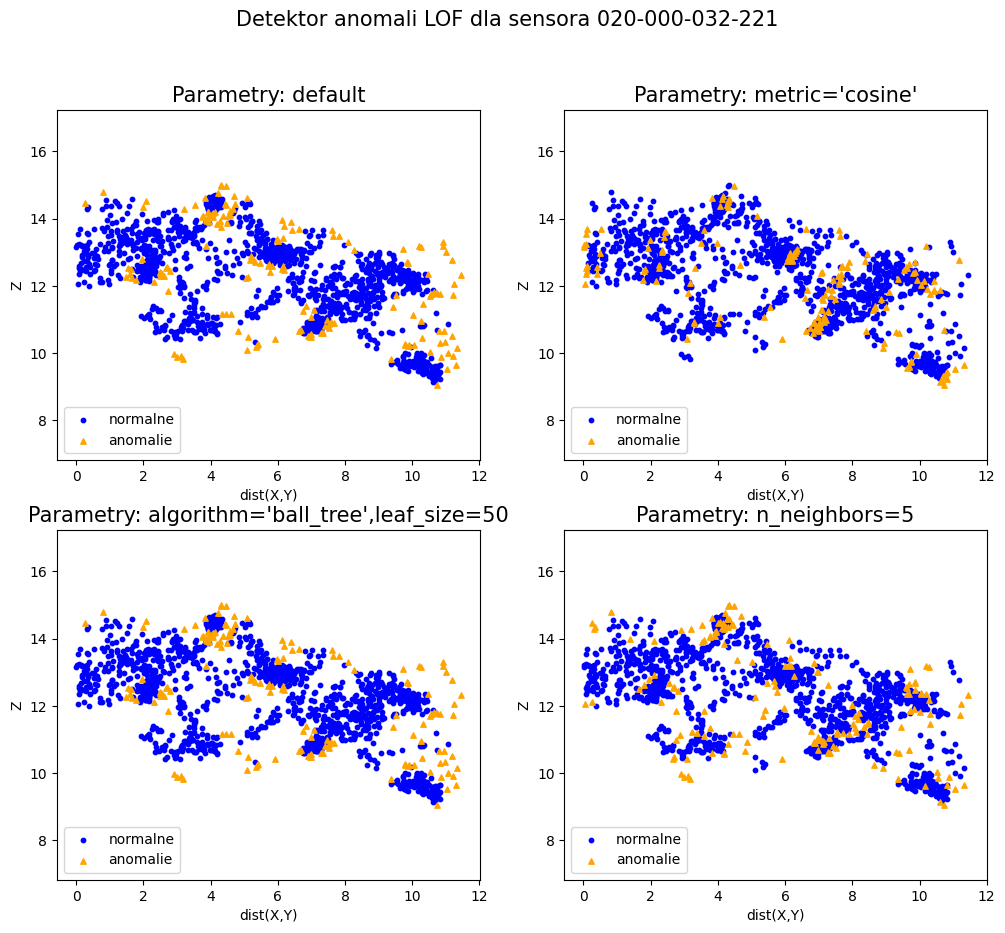

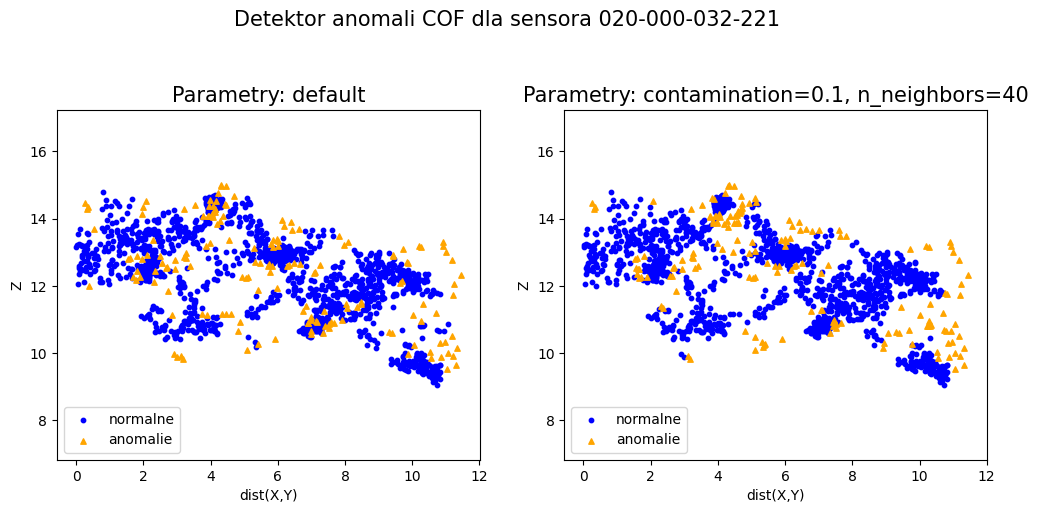

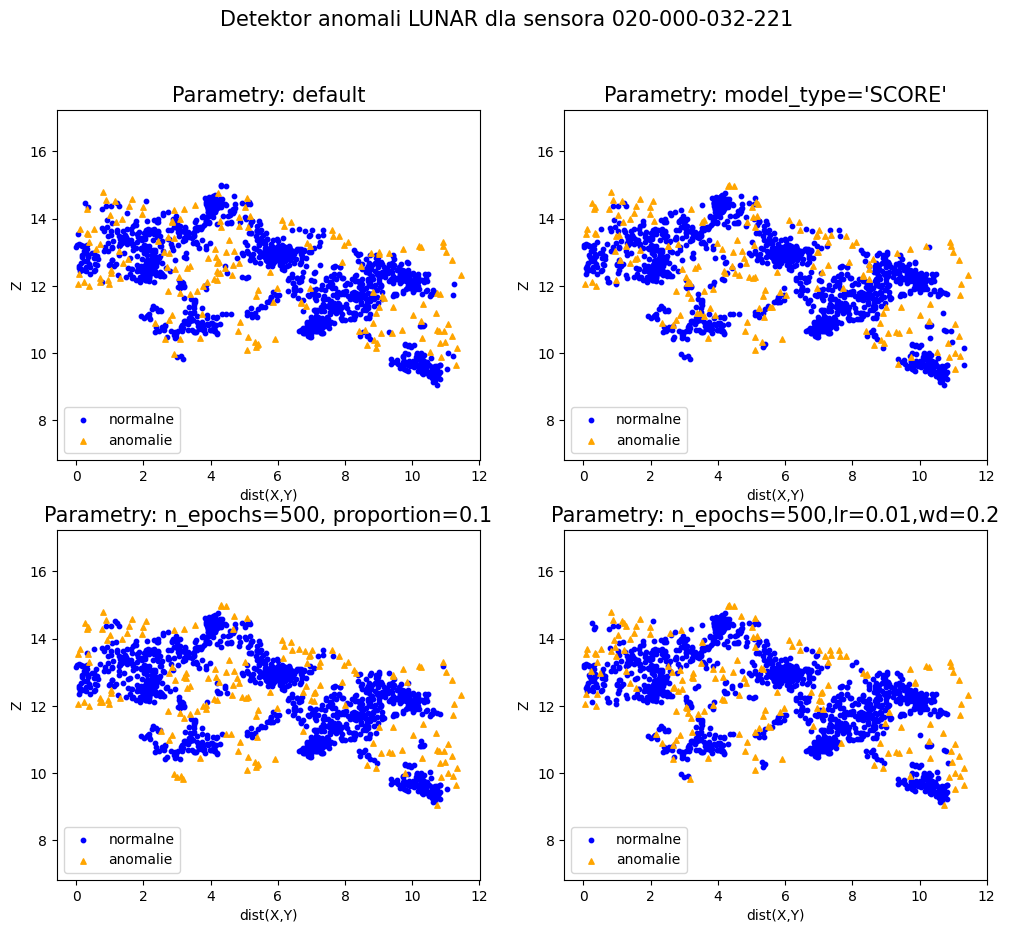

e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
e:\Python\Lib\site-packages\sklearn\utils\deprecation.py:87: Fut

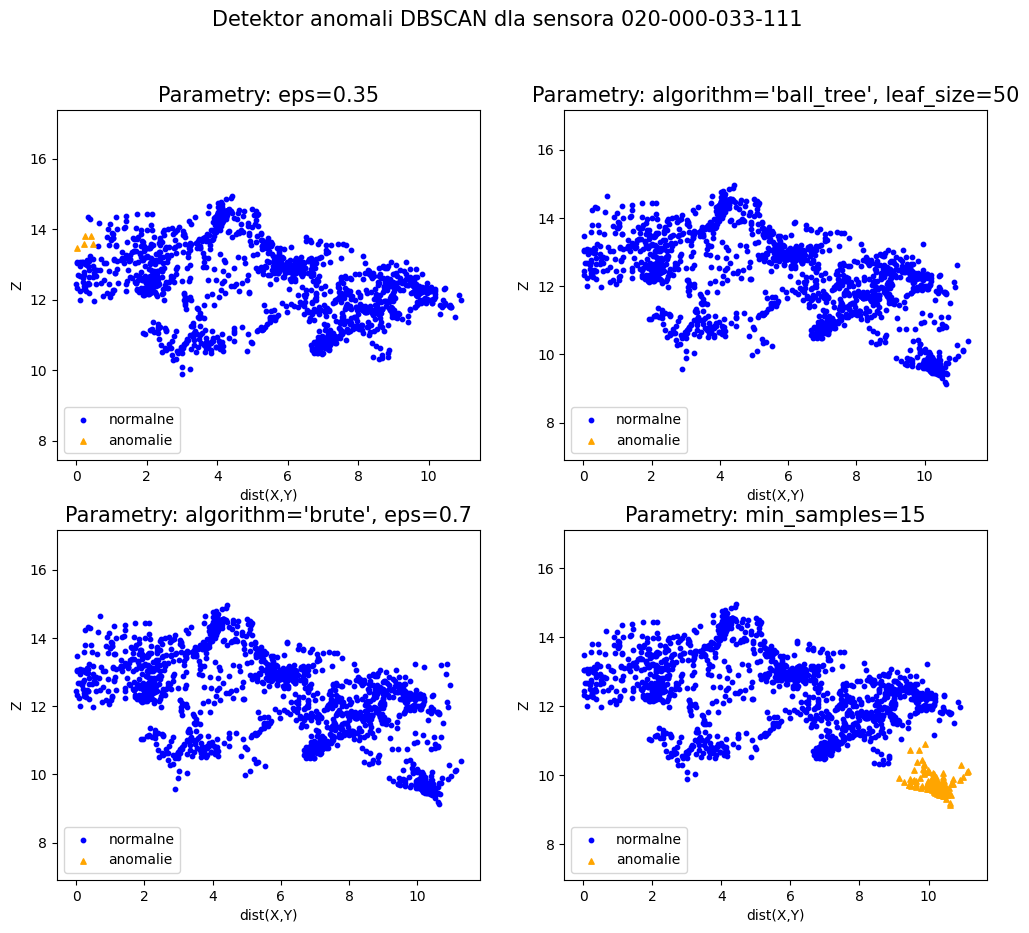

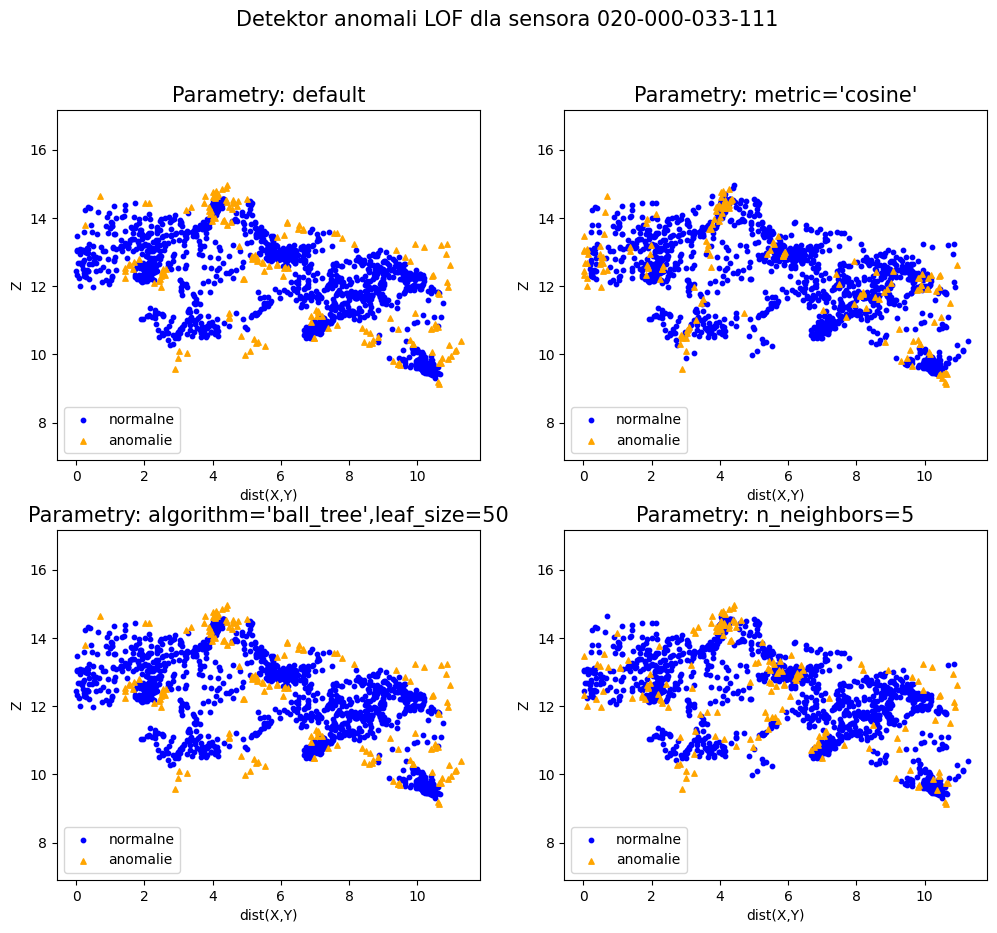

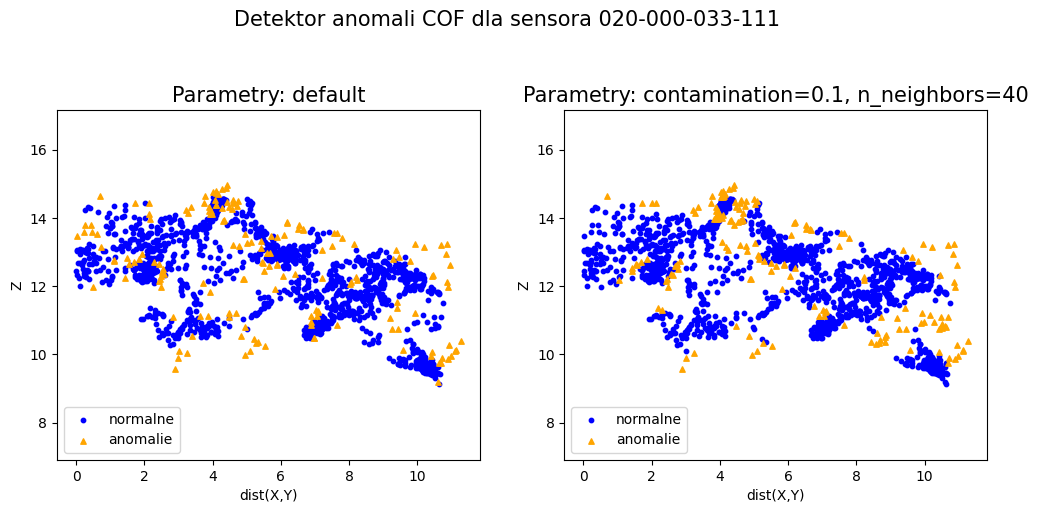

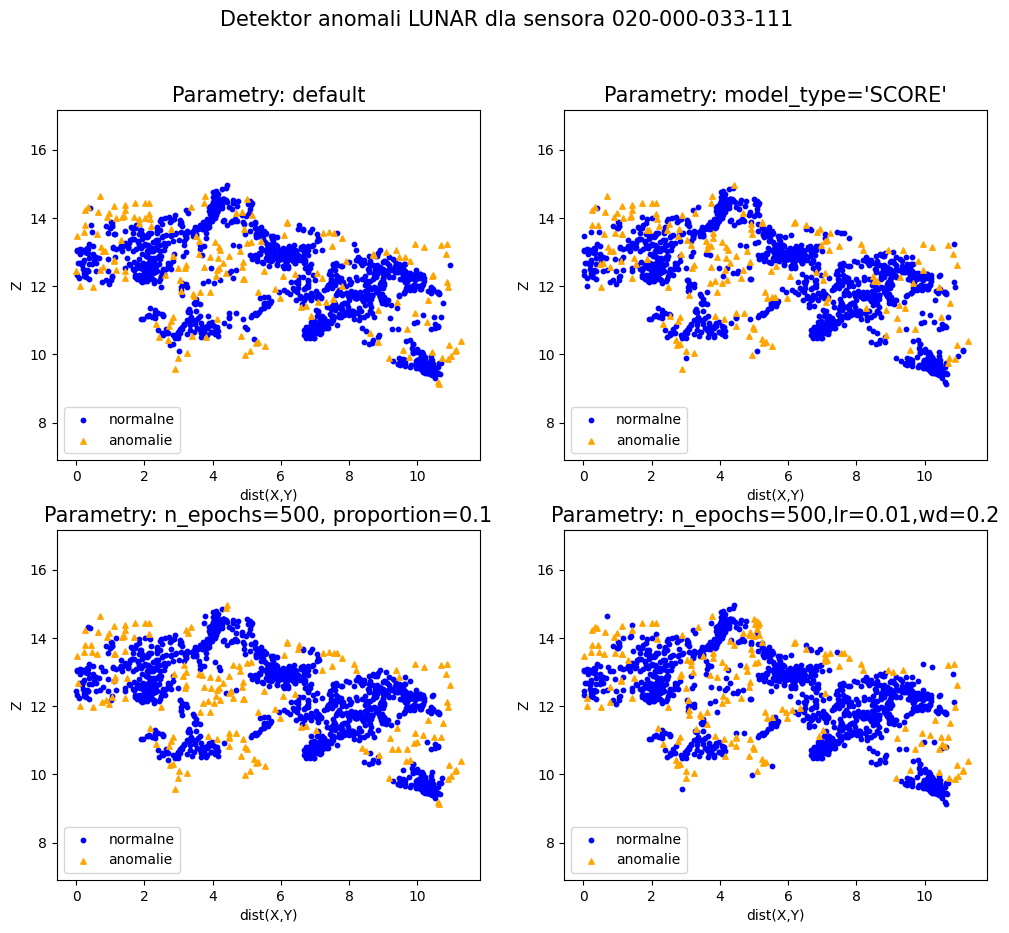

In [42]:

in_colors = ['blue', 'green', 'purple', 'brown', 'black']
out_colors = ['red', 'orange', 'grey', 'violet', 'pink']

sensors = ['010-000-024-033','010-000-030-096','020-000-032-221','020-000-033-111']
argunemts = [['eps=0.35', "algorithm='ball_tree', leaf_size=50","algorithm='brute', eps=0.7", "min_samples=15"],
             ['default',"metric='cosine'","algorithm='ball_tree',leaf_size=50","n_neighbors=5"],
             [ 'default',"contamination=0.1, n_neighbors=40"],
             ['default',"model_type='SCORE'","n_epochs=500, proportion=0.1","n_epochs=500,lr=0.01,wd=0.2"]]
detectors = [[DBSCAN(eps=0.35), DBSCAN(algorithm='ball_tree', leaf_size=50),DBSCAN(algorithm='brute',eps=0.7), DBSCAN(min_samples=15)],
              [LOF(), LOF(metric='cosine'), LOF(algorithm='ball_tree',leaf_size=50), LOF(n_neighbors=5)], [COF(),COF(contamination=0.1,n_neighbors=40)], [LUNAR(),LUNAR(model_type='SCORE'), LUNAR(n_epochs=500, proportion=0.1), LUNAR(n_epochs=500,lr=0.01,wd=0.2)]]
names = ["DBSCAN", "LOF", "COF", "LUNAR"]


train_all = pd.read_csv("./Zadanie3/data_0.csv")
train_all['dist(X+Y)'] = abs(train_all['x'] - train_all['y'])
train_all = train_all[['dist(X+Y)','z','x','y','010-000-024-033','010-000-030-096','020-000-032-221','020-000-033-111','anomaly']]

# test_all = pd.read_csv("./Zadanie3/data_22.csv")
# test_all['dist(X+Y)'] = abs(test_all['x'] - test_all['y'])
# test_all = test_all[['dist(X+Y)','z','x','y','010-000-024-033','010-000-030-096','020-000-032-221','020-000-033-111','anomaly']]

for sen in sensors:
    X_train = train_all.where(train_all[sen] == 1.0).dropna().reset_index(drop=True).iloc[:,:2].to_numpy()
    y_train = train_all.where(train_all[sen] == 1.0).dropna().reset_index(drop=True).iloc[:,-1:].to_numpy()
    # X_test = test_all.where(test_all[sen] == 1.0).dropna().reset_index(drop=True).iloc[:,:2].to_numpy()
    # y_test = test_all.where(test_all[sen] == 1.0).dropna().reset_index(drop=True).iloc[:,-1:].to_numpy()
    if X_train.shape[1] != 2:
                    raise ValueError("Input data has to be 2-d for visualization. The "
                                "input data has {shape}.".format(shape=X_train.shape))
    for i in range(0,len(detectors)):
            argument = argunemts[i]
            clfs = detectors[i]
            fig = plt.figure(figsize=(12, 10))
            clf_name = names[i]
            plt.suptitle("Detektor anomali {clf_name} dla sensora {sen}".format(clf_name=clf_name, sen=sen),
                            fontsize=15)
            for i, clf in enumerate(clfs):
                y_test_pred = clf.fit_predict(X_train)
                y_train_pred = clf.labels_ 
                X_train_outliers_pred, X_train_inliers_pred = get_outliers_inliers(
                    X_train, y_train_pred)
                # plot ground truth vs. predicted results
                fig.add_subplot(2,2,i+1)
                add_sub_plot(X_train_inliers_pred, X_train_outliers_pred,
                            'Parametry: {argument}'.format(argument=argument[i]), inlier_color='blue',
                            outlier_color='orange')
    plt.show()
    